<a href="https://colab.research.google.com/github/myLabBySupagon/EDA_and_DataCleansing_using-python_E-CommerceData_80000Products/blob/main/EDA_and_data_cleansing_by_supagon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA and Data cleansing via using python

Dataset: : https://www.kaggle.com/datasets/oleksiimartusiuk/e-commerce-data-shein?resource=download

สามารถนำไฟล์ zip ของ dataset โหลดเข้า colab และรันโค้ดที่ละส่วนได้เลย

In [ ]:
!unzip Dirty_E-Commerce_Data.zip -d csv_dirty_e-commerce_data
# !unzip ชื่อไฟล์ซิป -d ชื่อไฟล์




Archive:  Dirty_E-Commerce_Data.zip
  inflating: csv_dirty_e-commerce_data/us-shein-appliances-3987.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-automotive-4110.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-baby_and_maternity-4433.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-bags_and_luggage-4299.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-beauty_and_health-4267.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-curve-2849.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-electronics-4395.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-home_and_kitchen-3719.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-home_textile-3883.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-jewelry_and_accessories-3548.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-kids-4314.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-mens_clothes-1891.csv  
  inflating: csv_dirty_e-commerce_data/us-shein-office_and_school_supplies-4233.csv  
  in

In [ ]:
import pandas as pd
import glob
import os
from collections import defaultdict, Counter

csv_files = glob.glob('csv_dirty_e-commerce_data/*.csv')

columns_per_file = {}
for file in csv_files:
    try:
        columns = list(pd.read_csv(file, nrows=1).columns)
        columns_per_file[file] = columns
    except Exception as e:
        print(f"❌ อ่านไม่ได้: {file} | Error: {e}")

group_by_col_count = defaultdict(list)
for file, cols in columns_per_file.items():
    group_by_col_count[len(cols)].append((file, cols))

for col_count, file_col_pairs in group_by_col_count.items():
    print(f"\n📊 จำนวนคอลัมน์: {col_count} ➡️ พบ {len(file_col_pairs)} ไฟล์")

    col_signature_counter = Counter()
    file_to_signature = {}

    for file, cols in file_col_pairs:
        signature = tuple(sorted(cols))
        col_signature_counter[signature] += 1
        file_to_signature[file] = signature

    main_signature, main_count = col_signature_counter.most_common(1)[0]
    main_cols = list(main_signature)

    print(f"✅ กลุ่มเหมือนกันทั้งหมด: {main_count} ไฟล์")
    print(f"📋 ชื่อคอลัมน์ที่เหมือนกัน: {main_cols}\n")

    matched_files = set()
    unmatched_files = set()

    for signature, count in col_signature_counter.items():
        files_in_group = [f for f, sig in file_to_signature.items() if sig == signature]

        if signature == main_signature:
            print("✔️ รายชื่อไฟล์ที่คอลัมน์เหมือนกันหมด:")
            for file in files_in_group:
                print(f"   - {os.path.basename(file)}")
            matched_files.update(files_in_group)
        else:
            print("⚠️ รายชื่อไฟล์ที่คอลัมน์ไม่เหมือนกันหมด:")
            extra = set(signature) - set(main_signature)
            missing = set(main_signature) - set(signature)
            if extra:
               print(f"   🔺 คอลัมน์เกินจากไฟล์อื่น: {sorted(extra)}")
            if missing:
                print(f"   🔻 คอลัมน์ขาดจากไฟล์อื่น: {sorted(missing)}")

            for file in files_in_group:
                print(f"   - {os.path.basename(file)}")
            unmatched_files.update(files_in_group)
        print()

    print(f"📌 สรุปผลในกลุ่มนี้:")
    print(f"   - ไฟล์ที่คอลัมน์เหมือนกันทั้งหมด: {len(matched_files)} ไฟล์")
    print(f"   - ไฟล์ไม่เหมือน (มีเกิน/ขาด): {len(unmatched_files)} ไฟล์")
    print(f"---------------------------------------------------")



📊 จำนวนคอลัมน์: 8 ➡️ พบ 6 ไฟล์
✅ กลุ่มเหมือนกันทั้งหมด: 4 ไฟล์
📋 ชื่อคอลัมน์ที่เหมือนกัน: ['discount', 'goods-title-link', 'goods-title-link--jump', 'goods-title-link--jump href', 'price', 'rank-sub', 'rank-title', 'selling_proposition']

✔️ รายชื่อไฟล์ที่คอลัมน์เหมือนกันหมด:
   - us-shein-jewelry_and_accessories-3548.csv
   - us-shein-appliances-3987.csv
   - us-shein-office_and_school_supplies-4233.csv
   - us-shein-tools_and_home_improvement-3903.csv

⚠️ รายชื่อไฟล์ที่คอลัมน์ไม่เหมือนกันหมด:
   🔺 คอลัมน์เกินจากไฟล์อื่น: ['color-count']
   🔻 คอลัมน์ขาดจากไฟล์อื่น: ['selling_proposition']
   - us-shein-swimwear-3761.csv

⚠️ รายชื่อไฟล์ที่คอลัมน์ไม่เหมือนกันหมด:
   🔺 คอลัมน์เกินจากไฟล์อื่น: ['color-count', 'product-locatelabels-img src']
   🔻 คอลัมน์ขาดจากไฟล์อื่น: ['goods-title-link--jump', 'goods-title-link--jump href']
   - us-shein-womens_clothing-4620.csv

📌 สรุปผลในกลุ่มนี้:
   - ไฟล์ที่คอลัมน์เหมือนกันทั้งหมด: 4 ไฟล์
   - ไฟล์ไม่เหมือน (มีเกิน/ขาด): 2 ไฟล์
---------------------

จำนวนแถว: 82105
จำนวนคอลัมน์: 13
 
หาข้อมูลซ้ำซ้อน: 2876

ข้อมูลเกี่ยวกับประเภทของคอลัมน์ (dtypes) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82105 entries, 0 to 82104
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goods-title-link--jump        664 non-null    object 
 1   goods-title-link--jump href   664 non-null    object 
 2   rank-title                    14605 non-null  object 
 3   rank-sub                      14605 non-null  object 
 4   price                         82103 non-null  object 
 5   selling_proposition           54364 non-null  object 
 6   discount                      54977 non-null  object 
 7   goods-title-link              81427 non-null  object 
 8   category                      82105 non-null  object 
 9   color-count                   19743 non-null  float64
 10  blackfridaybelts-bg src       3791 non-null   object 
 11  blackfridaybelts-co

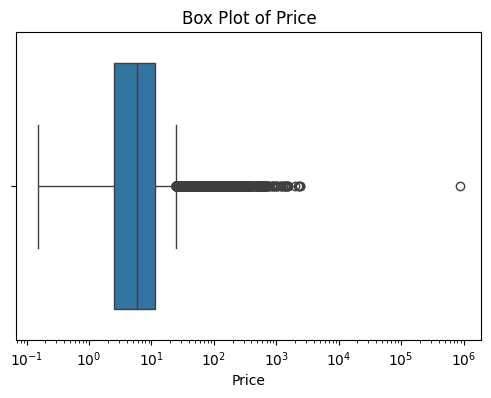


Correlation Matrix:
             price  discount
price     1.000000 -0.043707
discount -0.043707  1.000000


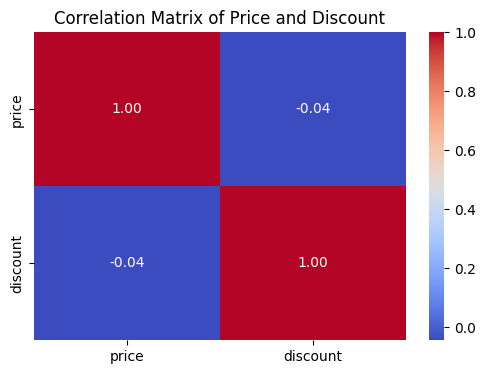

,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,selling_proposition,discount,goods-title-link,category,color-count,blackfridaybelts-bg src,blackfridaybelts-content,product-locatelabels-img src
29400,1pc Portable Dog Water Bottle With Drinking Bo...,https://us.shein.com/1pc-Portable-Dog-Water-Bo...,#1 Best Sellers,in Pet Travel Bowls & Bottles,3.06,NaN,-60.0,NaN,pet supplies,NaN,https://img.ltwebstatic.com/images3_ccc/2023/1...,Save $4.64,NaN
29401,"Dog Squeaky Chew Toy, Interactive Plush Dog To...",https://us.shein.com/Dog-Squeaky-Chew-Toy-Inte...,NaN,NaN,2.74,200+ sold recently,-44.0,NaN,pet supplies,NaN,https://img.ltwebstatic.com/images3_ccc/2023/1...,Save $2.16,NaN
29402,"1pc 3-In-1 Cat Grooming Tool: Comb, Steam Groo...",https://us.shein.com/1pc-3-In-1-Cat-Grooming-T...,#5 Best Sellers,in Pet Grooming Appliances,3.80,NaN,NaN,NaN,pet supplies,NaN,NaN,NaN,NaN
29403,1pc Dog Footprint Printed Sports Style Cat And...,https://us.shein.com/1pc-Dog-Footprint-Printed...,NaN,NaN,2.00,100+ sold recently,NaN,NaN,pet supplies,5.0,NaN,NaN,NaN
29404,"1pc Green Pet Water & Food 2-In-1 Cup, Portabl...",https://us.shein.com/1pc-Green-Pet-Water-Food-...,NaN,NaN,6.08,100+ sold recently,-20.0,NaN,pet supplies,4.0,https://img.ltwebstatic.com/images3_ccc/2023/1...,Save $1.52,NaN
29405,Indestructible Rubber Ball Dog Toy For Cleanin...,https://us.shein.com/Indestructible-Rubber-Bal...,NaN,NaN,2.16,100+ sold recently,-20.0,NaN,pet supplies,NaN,https://img.ltwebstatic.com/images3_ccc/2023/1...,Save $0.54,NaN
29406,PETSIN 1pc Pet Sweatshirt With Letter Printed ...,https://us.shein.com/PETSIN-1pc-Pet-Sweatshirt...,NaN,NaN,1.68,500+ sold recently,-20.0,NaN,pet supplies,NaN,NaN,NaN,NaN
29407,1pc Pet Bite Resistant Plush Dinosaur Toy With...,https://us.shein.com/1pc-Pet-Bite-Resistant-Pl...,#4 Best Sellers,in Pet Chew Toys,4.02,NaN,-33.0,NaN,pet supplies,NaN,https://img.ltwebstatic.com/images3_ccc/2023/1...,Save $1.98,NaN
29408,"Conlun Silicone Dog Food Mat, 1 Pcs Waterproof...",https://us.shein.com/Conlun-Silicone-Dog-Food-...,NaN,NaN,6.27,NaN,-45.0,NaN,pet supplies,4.0,NaN,NaN,NaN
29409,1set Adorable Pet Harness With Matching Leash ...,https://us.shein.com/1set-Adorable-Pet-Harness...,#9 Best Sellers,"in Pet Collars, Leashes & Harnesses Sets",4.24,NaN,-20.0,NaN,pet supplies,NaN,https://img.ltwebstatic.com/images3_ccc/2023/1...,Save $1.06,NaN


In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import re

csv_files = glob.glob('csv_dirty_e-commerce_data/*.csv')
df_list = []


for file in csv_files:
    df = pd.read_csv(file)
    df['category'] = os.path.basename(file.split('/us-shein-')[-1]).replace('.csv', '')
    df['category'] = df['category'].str[:-5]
    df['category'] = df['category'].str.replace('_', ' ', regex=False)
    df_list.append(df)


df_product = pd.concat(df_list, axis=0, ignore_index=True, sort=False)


rows = df_product.shape[0]
cols  = df_product.shape[1]
print(f"จำนวนแถว: {rows}")
print(f"จำนวนคอลัมน์: {cols}")
print(f" \nหาข้อมูลซ้ำซ้อน: {df_product.duplicated().sum()}")
print("\nข้อมูลเกี่ยวกับประเภทของคอลัมน์ (dtypes) ")
print(df_product.info())
print("\n")

missing_counts   = df_product.isnull().sum()
print(f" Missing Values: \n{missing_counts}")
total_rows = df_product.shape[0]
missing_percentages = (missing_counts / total_rows ) * 100
print(f"\n Missing Percentages of All Data : \n{missing_percentages}")

df_product['discount'] = df_product['discount'].str.replace('%', '').astype(float)
df_product['discount'] = pd.to_numeric(df_product['discount'], errors='coerce')



df_product['price'] = df_product['price'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '', x) if pd.notna(x) else x)
df_product['price'] = pd.to_numeric(df_product['price'], errors='coerce')

print(f" \nสรุปสถิติพื้นฐาน:\n {df_product.describe()}")

print(f"\nการกระจายของข้อมูล")
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_product['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.xscale('log')
plt.show()


numeric_cols = ['price', 'discount']
correlation_matrix = df_product[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price and Discount')
plt.show()

df_product.iloc[29400 :29410]

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
from scipy.stats import zscore
from scipy import stats
from google.colab import files
import re

csv_files = glob.glob('csv_dirty_e-commerce_data/*.csv')
df_list = []

usd_to_thb_rate = 32.4

def convert_k_to_number(val):
    if pd.isnull(val):
        return np.nan
    val = val.strip().lower().replace(' ', '')
    if 'k' in val:
        return float(val.replace('k', '')) * 1000
    return float(val)

for file in csv_files:
    df = pd.read_csv(file)
    df['category'] = os.path.basename(file.split('/us-shein-')[-1]).replace('.csv', '')
    df['category'] = df['category'].str[:-5]
    df['category'] = df['category'].str.replace('_', ' ', regex=False)
    df = df.drop(columns=['goods-title-link--jump href','product-locatelabels-img src','blackfridaybelts-bg src','rank-sub'], errors='ignore')
    df = df[(df['price'] != 0) & (df['price'].notna())]
    df = df.rename(columns={'rank-title':'top_10_rank','goods-title-link':'goods_title','color-count':'color_count','blackfridaybelts-content':'black_friday_belts'})
    df_list.append(df)

df_product = pd.concat(df_list, axis=0, ignore_index=True, sort=False)

df_product['price'] = df_product['price'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '', x) if pd.notna(x) else x)
df_product['price'] = pd.to_numeric(df_product['price'], errors='coerce')
price_thail_bath=usd_to_thb_rate * df_product['price']
df_product['price'] =price_thail_bath.round(2)

df_product['discount'] = df_product['discount'].str.replace('-', '')
df_product['discount'] = (df_product['discount'].str.replace('%', '').astype(np.float64) / 100)
df_product['discount'] = df_product['discount'].fillna(0)

df_product['color_count'] = df_product['color_count'].fillna(1).astype(int)

df_product['black_friday_belts'] = df_product['black_friday_belts'].str[-5:]
df_product['black_friday_belts'] = df_product['black_friday_belts'].str.replace('$', '')
df_product['black_friday_belts']= pd.to_numeric(df_product['black_friday_belts'], errors='coerce')
blackfridaybeltscontent_thail_bath=usd_to_thb_rate * df_product['black_friday_belts']
df_product['black_friday_belts'] =blackfridaybeltscontent_thail_bath.round(2)
df_product['black_friday_belts'] = df_product['black_friday_belts'].fillna(0)

df_product['selling_proposition'] = df_product['selling_proposition'].str.replace('+ sold recently', '')
df_product['selling_proposition'] = df_product['selling_proposition'].apply(convert_k_to_number)
df_product['selling_proposition'] = df_product['selling_proposition'].fillna(0).astype(int)


df_product['top_10_rank'] = df_product['top_10_rank'].str[:-12]
df_product['top_10_rank'] = df_product['top_10_rank'].str.replace('#', '')
df_product['top_10_rank'] = df_product['top_10_rank'].fillna('not ranked')

df_product['price_after_discount'] = (df_product['price'] - df_product['discount']).round(2)
df_product['price_after_discount_special'] = (df_product['price']-df_product['black_friday_belts']).round(2)
df_product['item_sales_normal'] = ((df_product['price_after_discount']) * df_product['selling_proposition']).round(2)

df_product['goods_title'] = df_product['goods_title'].fillna(df_product['goods-title-link--jump'])
df_product = df_product[(df_product['goods_title'] != 0) & (df_product['goods_title'].notna())]
df_product['goods_title'] = df_product['goods_title'].str.lower()
df_product = df_product.drop(columns=['goods-title-link--jump'], errors='ignore')

df_product['selling_proposition'] = df_product['selling_proposition'].replace('"', '')

missing_counts   = df_product.isnull().sum()
print(f" Missing Values: \n{missing_counts}\n")

df_product = df_product.drop_duplicates() #ลบแถวที่ซ้ำ (โดยเก็บแถวแรกไว้)

df_product.reset_index(drop=True, inplace=True)
df_product.insert(0, 'No', df_product.index+1)

desired_order = ['No', 'category', 'goods_title','color_count', 'price', 'selling_proposition', 'discount','black_friday_belts','price_after_discount','price_after_discount_special','item_sales_normal','top_10_rank']
other_cols = [c for c in df_product.columns if c not in desired_order]
df_product = df_product[desired_order]

# df_product.iloc[100 :110]

df_product.to_csv('cleaned_ecommerce_data.csv', index=False)
files.download('cleaned_ecommerce_data.csv')

 Missing Values: 
top_10_rank                     0
price                           0
selling_proposition             0
discount                        0
goods_title                     0
category                        0
color_count                     0
black_friday_belts              0
price_after_discount            0
price_after_discount_special    0
item_sales_normal               0
dtype: int64


ข้อมูลเกี่ยวกับประเภทของคอลัมน์ (dtypes) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79171 entries, 0 to 79170
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   No                            79171 non-null  int64  
 1   category                      79171 non-null  object 
 2   goods_title                   79171 non-null  object 
 3   color_count                   79171 non-null  int64  
 4   price                         79171 non-null  float64
 5   selling_proposition     

/tmp/ipython-input-31-4147417052.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['goods_title'] = df_product['goods_title'].str.lower()


,No,category,goods_title,color_count,price,selling_proposition,discount,black_friday_belts,price_after_discount,price_after_discount_special,item_sales_normal,top_10_rank
100,101,jewelry and accessories,19pcs/set fashionable exquisite retro vacation...,1,42.12,600,0.00,0.0,42.12,42.12,25272.0,not ranked
101,102,jewelry and accessories,4pcs/set luxury square shape rhinestone inlaid...,1,54.43,3700,0.20,0.0,54.23,54.43,200651.0,not ranked
102,103,jewelry and accessories,1pc european and american fashionable simple s...,1,40.50,800,0.22,0.0,40.28,40.50,32224.0,not ranked
103,104,jewelry and accessories,3pcs women's pink purple green gradient color ...,1,87.48,300,0.07,0.0,87.41,87.48,26223.0,not ranked
104,105,jewelry and accessories,medium-sized exaggerated drop-shaped earrings ...,1,48.60,6200,0.00,0.0,48.60,48.60,301320.0,not ranked
105,106,jewelry and accessories,"10 pieces, kraft paper cake box (6''x3.5''x3.5...",1,193.10,100,0.19,0.0,192.91,193.10,19291.0,not ranked
106,107,jewelry and accessories,6pcs elastic rope beaded women's bracelet,1,100.44,7700,0.00,0.0,100.44,100.44,773388.0,not ranked
107,108,jewelry and accessories,1pair new fashion creative pineapple stud earr...,1,48.60,3900,0.00,0.0,48.60,48.60,189540.0,not ranked
108,109,jewelry and accessories,1200pcs 48 compartmentsglass beads for jewelry...,1,435.46,900,0.20,0.0,435.26,435.46,391734.0,not ranked
109,110,jewelry and accessories,5pcs gold bracelets for women stretch beaded b...,1,74.52,200,0.00,0.0,74.52,74.52,14904.0,not ranked
